In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

### Résolution d'équations différentielles

Ce module permet de calculé la solution d'une équation différentielle du type :

$$ y'(t) = f(y(t),\, t)$$

A l'usage on définit la fonction $f$ puis on donne à `odeint` (intégration d'une Ordinary Differential Equation)

* $f(y, t)$
* la solution pour le premier point (la solution est définie à une constante près) 
* la liste des points pour lesquels on résoud l'équation

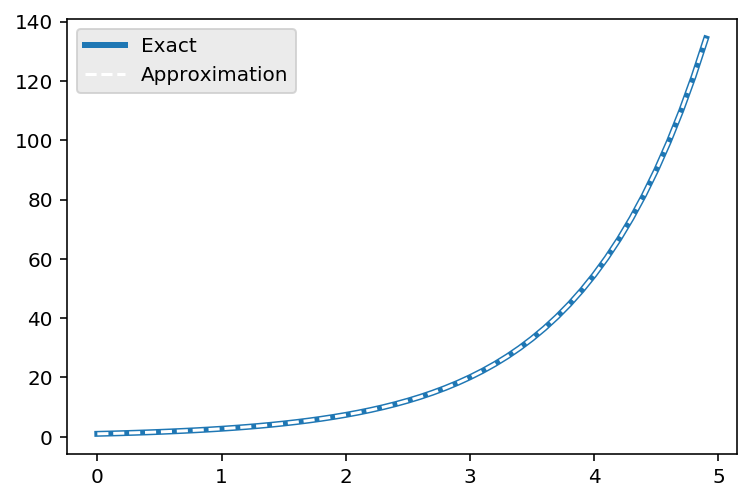

In [2]:
from scipy.integrate import odeint
import numpy as np

def f(y,t):
    return y

t = np.arange(0,5, 0.1)
res = odeint(f, 1, t)  # 1 est la valeur de la solution pour le premier point
plt.plot(t, res, linewidth=3, label='Exact')
plt.plot(t, np.exp(t), '--w', label='Approximation')
plt.legend().get_frame().set_facecolor('0.9')

#### Étude paramétrique

Imaginons que l'on désire faire une étude paramétrique de la résolution de $y' = a \; y + b\quad$ avec a et b qui varient, on va transférer
les paramètres à notre fonctions en ajoutant des arguments et en indiquant à `odeint` qu'il y a des arguments supplémentaires.

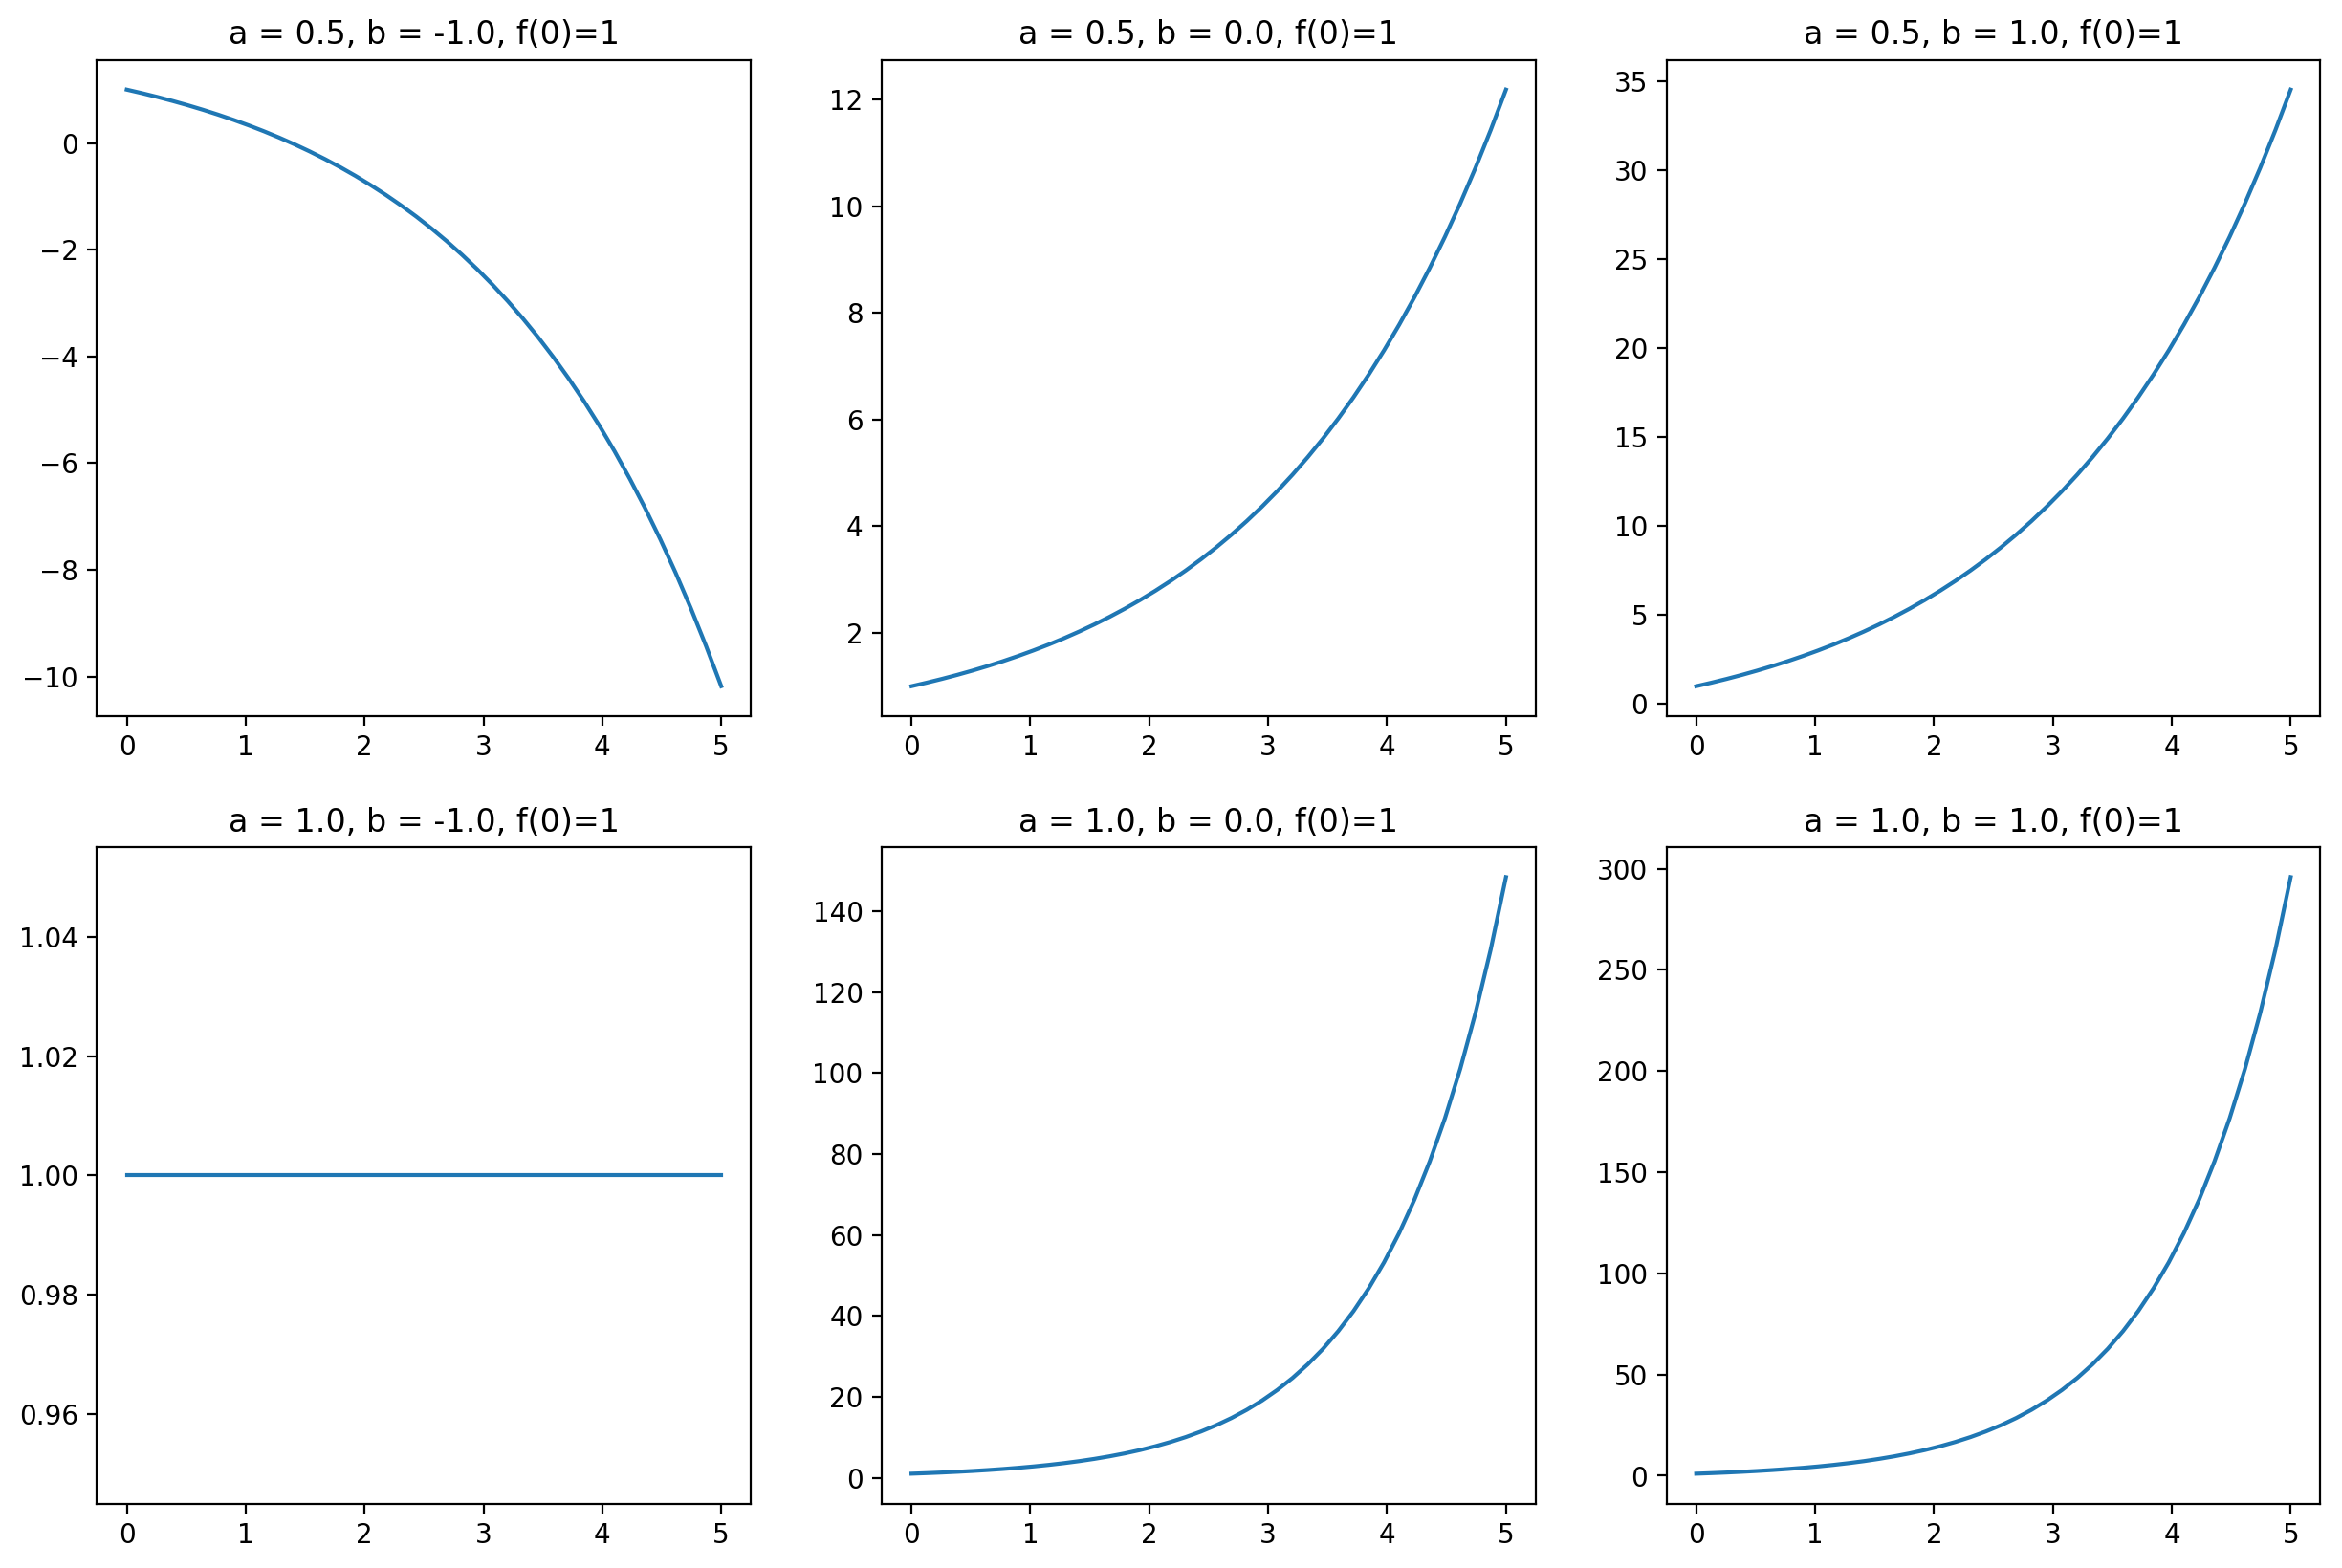

In [3]:
def g(y,t,a,b):
    return a*y + b

plt.figure(figsize=(15,10), dpi=100)
t = np.linspace(0,5,40)
k = 1
for a in [0.5,1]:       # 2 valeurs pour a
    for b in [-1,0,1]:   # 3 valeurs pour b, cf subplot ci-dessous
      res = odeint(g, 1, t, args=(a,b))  # ce qui est dans args est passé à la fonction après les arguments y et t
      ax = plt.subplot(230+k, title="a = %.1f, b = %.1f, f(0)=1" % (a,b))
      ax.plot(t,res)
      k += 1

#### Équation différentielle linéaire d'ordre 2

Enfin `y` dans la fonction transmise à `odeint` peut être un vecteur ce qui permet de résoudre des équations de dégré supérieur. Essayons de résoudre
l'oscillation amortie du masse au bout d'un ressort :

$$y''(t) + \nu y'(t) + \omega^2 y(t) = 0$$

avec le vecteur $Y = (y,y')$. Cela donne le système :

$$
\begin{align}
Y[0]' & = Y[1] \newline
Y[1]' & = -\nu Y[1] - \omega^2\; Y[0]
\end{align}
$$

Soit 2 équations linéaire de degré 1. On donne donc la fonction vectorielle $f$ qui décrit ce système
à `odeint` qui retourne alors $y$ et $y'$.

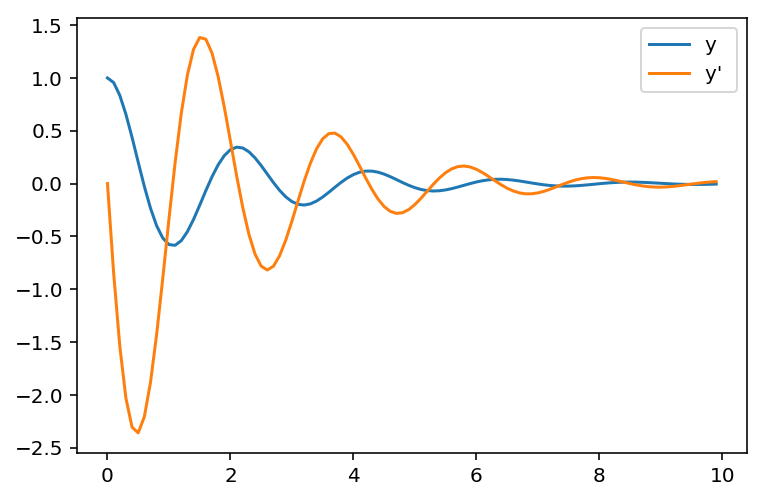

In [4]:
def f(Y, t, mu, omega):
    return Y[1], -mu * Y[1] - omega**2 * Y[0]  # ceci est un vecteur

t = np.arange(0,10,0.1)
res = odeint(f, (1,0), t, args=(1,3)) # valeurs initiale : y=1, y'=0
plt.plot(t,res[:,0], label='y ')
plt.plot(t,res[:,1], label="y' ")
plt.legend()

{{ PreviousNext("sp01 Integration.ipynb", "../lesson6 Pandas/pd01 -- Pandas indexing.ipynb")}}